In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [530]:
data_frame = pd.read_csv('train.csv')

In [531]:
data_frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [532]:
data_frame = data_frame.rename(columns={'SibSp': 'Relatives_count'})

In [533]:
data_frame.groupby('Relatives_count', as_index=False).agg({'Survived' : 'sum'}).sort_values('Survived', ascending=False)

,Relatives_count,Survived
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3
5,5,0
6,8,0


In [534]:
print('Вывод: чем меньше у пассажира было родственников на борту, тем больше у него было шансов выжить')

Вывод: чем меньше у пассажира было родственников на борту, тем больше у него было шансов выжить


In [535]:
data_frame.groupby('Sex', as_index=False).agg({'Survived' : 'sum'}).sort_values('Survived', ascending=False)

,Sex,Survived
0,female,233
1,male,109


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

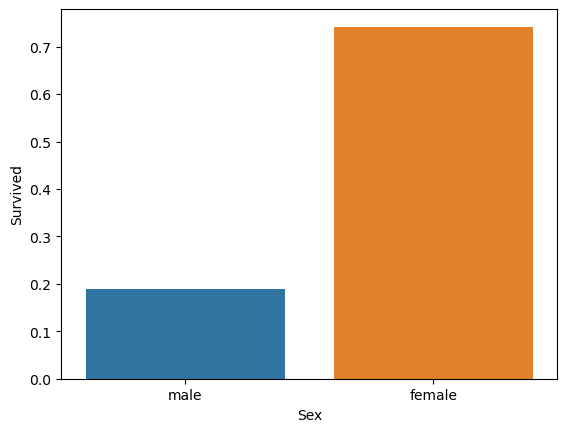

In [536]:
sns.barplot(data=data_frame, x='Sex', y='Survived', ci=None)

In [537]:
print('Вывод: среди выживших больше всего женщин')

Вывод: среди выживших больше всего женщин


In [538]:
data_frame.groupby('Embarked', as_index=False).agg({'Survived' : 'sum'}).sort_values('Survived', ascending=False)

,Embarked,Survived
2,S,217
0,C,93
1,Q,30


In [539]:
print('Вывод: больше всего пвыжило пассажиров, которые сели в Саутгемптоне')

Вывод: больше всего пвыжило пассажиров, которые сели в Саутгемптоне


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

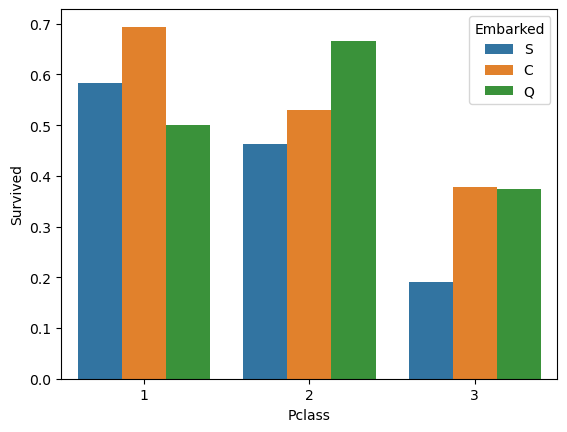

In [540]:
sns.barplot(data=data_frame, x='Pclass', y='Survived', hue='Embarked', ci=None)

In [541]:
print('Соотношение выживших в зависимости от порта посадки и класса пассажира')

Соотношение выживших в зависимости от порта посадки и класса пассажира


In [542]:
# Получение данных из стобца
def get_values():
    lst = []
    for i in range(len(data_frame.Ticket)):
        lst.append(data_frame['Ticket'].values[i])
    return lst

In [543]:
# Проверка на счастливый билет
def lucky_ticket(lst):
    updated_lst = []
    pattern = re.compile('^\\d{6}$') # Регулярка отбрасывает неподходящие значения
    for item in lst:
        if re.findall(pattern, str(item)):
            try:
                a = [int(x) for x in str(item)]
                start = a[0] + a[1] + a[2]
                end = a[3] + a[4] + a[5]
                if start == end:
                    updated_lst.append(True)
                else:
                    updated_lst.append(False)
            except Exception as e:
                updated_lst.append(False)
                pass
        else:
            updated_lst.append(False)
    return updated_lst
                    

In [544]:
lst = get_values()
lst = lucky_ticket(lst)
data_frame['LuckyTicket'] = lst

In [553]:
data_frame.groupby('LuckyTicket', as_index=False).agg({'Survived' : ['sum', 'count']})

LuckyTicket Survived      
                   sum count
0       False      335   864
1        True        7    27

<AxesSubplot:xlabel='LuckyTicket', ylabel='Survived'>

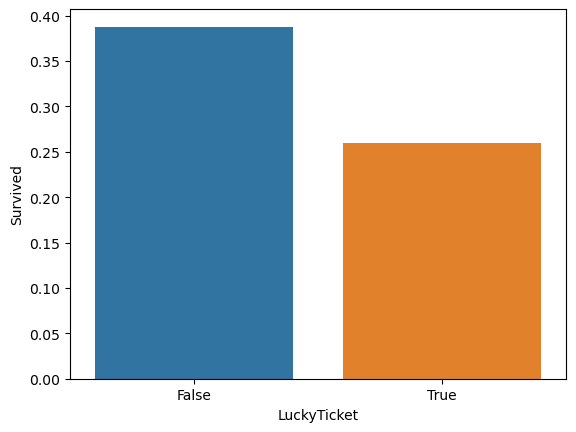

In [548]:
sns.barplot(data=data_frame, x='LuckyTicket', y='Survived', ci=None)

In [564]:
data_frame.groupby('LuckyTicket', as_index=False).agg({'Survived' : 'mean'}).round(2)

,LuckyTicket,Survived
0,False,0.39
1,True,0.26


In [ ]:
print('Вывод: У обладателей счастливого билета шанс выжить был меньше')